Loading Mnist Dataset from keras library

In [2]:
from keras.datasets.fashion_mnist import load_data 
(X_train_full, y_train_full), (X_test, y_test) = load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
#Applying Max-Min Normalisation on the dataset
X_train_full = X_train_full/255
X_test = X_test / 255

In [4]:
#Creation of Traing and Validation Dataset.
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]


#Model Build:


##Encoder Part

In [6]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, GaussianNoise, Reshape

encoder = Sequential([
    Reshape([28, 28, 1], input_shape=[28, 28]),
    GaussianNoise(0.2),
    Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2),
    Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2),
    Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2)
])
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)         

##Decoder Part

In [7]:
from keras.layers import Conv2DTranspose

decoder = Sequential([
    Conv2DTranspose(64, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    Conv2DTranspose(32, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    Reshape([28, 28])
])
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 55,681
Trainable params: 55,681
Non-trainable params: 0
_________________________________________________________________


Model Configuration

In [8]:
from keras.optimizers import SGD

ae = Sequential([encoder,decoder])
ae.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.5))
ae.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 3, 3, 64)          23296     
_________________________________________________________________
sequential_2 (Sequential)    (None, 28, 28)            55681     
Total params: 78,977
Trainable params: 78,977
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model Training

In [9]:
history = ae.fit(X_train, X_train, epochs=20,
                      validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 68s 31ms/step - loss: 0.3528 - val_loss: 0.2884
Epoch 2/20
1719/1719 [==============================] - 51s 29ms/step - loss: 0.2877 - val_loss: 0.2809
Epoch 3/20
1719/1719 [==============================] - 50s 29ms/step - loss: 0.2817 - val_loss: 0.2776
Epoch 4/20
1719/1719 [==============================] - 51s 30ms/step - loss: 0.2799 - val_loss: 0.2767
Epoch 5/20
1719/1719 [==============================] - 51s 29ms/step - loss: 0.2771 - val_loss: 0.2746
Epoch 6/20
1719/1719 [==============================] - 50s 29ms/step - loss: 0.2761 - val_loss: 0.2735
Epoch 7/20
1719/1719 [==============================] - 50s 29ms/step - loss: 0.2755 - val_loss: 0.2729
Epoch 8/20
1719/1719 [==============================] - 51s 30ms/step - loss: 0.2746 - val_loss: 0.2724
Epoch 9/20
1719/1719 [==============================] - 51s 30ms/step - loss: 0.2740 - val_loss: 0.2716
Epoch 10/20
1719/1719 [==============================] - 50s 29m

Result Visualization

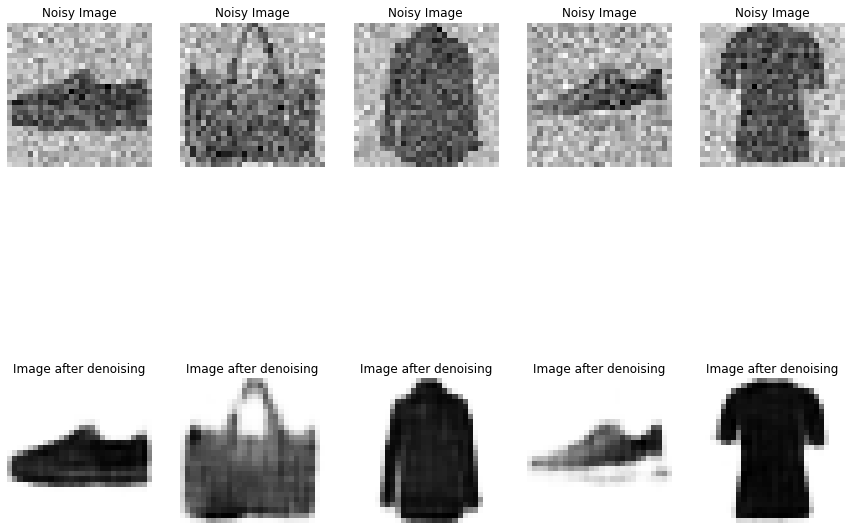

In [14]:
import matplotlib.pyplot as plt

corrupted_images = GaussianNoise(0.2)(X_valid[8:13], training=True)
reconstructed_images = ae.predict(corrupted_images)
plt.figure(figsize=(15,12))
for i in range(5):
    plt.subplot(2,5,1+i)
    plt.imshow(corrupted_images[i], cmap='binary')
    plt.axis('off')
    plt.title('Noisy Image')
    plt.subplot(2,5,6+i)
    plt.imshow(reconstructed_images[i], cmap='binary')
    plt.axis('off')
    plt.title('Image after denoising')
plt.show()